## Asynchronous ingestion of Futures Tick Data
This notebook demonstrates how to use the get_history calls of the Access layer to get tick-level historical pricing (timeseries history) data. Workspace carries 90 days of tick-level data. The Access layer provides a simplified interface designed for FinCoders. 

## Some popular RIC's for Futures
The data is for the front month continuation RIC only. 

**Commodity Futures:**
 - **CLc1**   : NYMEX Light Sweet Crude Oil WTI
 - **GCc1**   : 100 OZ GOLD
 - **NGc1**   : c1 NYMEX HENRY HUB NATURAL GAS FUTURES CHAIN 
 - **Sc1**    : c1 Soybean
 
**Equity Index Futures:** 
 - **ESc1**   : CME EMINI S&P Index Future
 - **NQc1**   : CME EMINI NASDAQ Index Future
 - **YMc1**   : CBT EMINI Dow Jones Index Future
 - **FDXc1**  : Eurex DAX Index Future
 - **FFIc1**  : LIFFE FTSE 100 Index Future
 - **FXXPc1** : Eurex STOXX Europe 600 Future
 
**Bond Futures:**
 - **TUc1**   : 2 Year Treasury Note
 - **FVc1**   : 5 Year Treasury Note
 - **TYc1**   : 10 Year Treasury Note
 - **USc1**   : US T BONDS
 - **AULc1**  : Long Term U.S. Treasury Bond futures (Ultra T-Bond futures)

#### Learn more

To learn more about the Data Library for Python please join the LSEG Developer Community. By [registering](https://developers.lseg.com/iam/register) and [logging](https://developers.lseg.com/content/devportal/en_us/initCookie.html) into the LSEG Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
this [Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The LSEG Developer Community will be happy to help. 

----

## Some Imports to start with

In [1]:
import refinitiv.data as rd
import pandas as pd
import matplotlib as mpl
import mplfinance as mpf
import asyncio
from refinitiv.data.content import historical_pricing
from refinitiv.data.content.historical_pricing import Intervals
from datetime import datetime,timedelta

## Open the data session

The open_session() function creates and open sessions based on the information contained in the refinitiv-data.config.json configuration file. Please edit this file to set the session type and other parameters required for the session you want to open.

In [2]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x120e78ee0 {name='workspace'}>

## Retrieve data

### Get tick data for ESc1 (S&P500 Continuation future)

In [4]:
d_now = datetime.now().date()
sdate = d_now - timedelta(days=1)
print(d_now,sdate)
i =['ESc1']
#for i in instruments:
df = rd.get_history(universe=i,interval="tick", start = str(sdate) , end = str(d_now), count = 10000)
df

2024-02-16 2024-02-15


ESc1,EVENT_TYPE,RTL,SOURCE_DATETIME,SEQNUM,TRDPRC_1,TRDVOL_1,ACVOL_UNS,VWAP,BID,BIDSIZE,...,TRD_STATUS,HALT_RSN,NETCHNG_1,AGGRS_SID1,OPEN_PRC,HIGH_1,LOW_1,MID_PRICE,QUALIFIERS,TAG
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-15 23:25:47.766,quote,41008,2024-02-15T23:25:47.721000000Z,30589599,<NA>,<NA>,<NA>,<NA>,5048.5,37,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5048.625,OPN[PRC_QL_CD],d15_m02_y2024_h23_m25_s47_ms0766_0_41008_0_39
2024-02-15 23:25:47.766,quote,41200,2024-02-15T23:25:47.722000000Z,30589616,<NA>,<NA>,<NA>,<NA>,5048.5,38,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5048.625,OPN[PRC_QL_CD],d15_m02_y2024_h23_m25_s47_ms0766_0_41200_0_39
2024-02-15 23:25:47.766,quote,41184,2024-02-15T23:25:47.722000000Z,30589615,<NA>,<NA>,<NA>,<NA>,5048.5,38,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5048.625,OPN[PRC_QL_CD],d15_m02_y2024_h23_m25_s47_ms0766_0_41184_0_39
2024-02-15 23:25:47.766,quote,41168,2024-02-15T23:25:47.722000000Z,30589613,<NA>,<NA>,<NA>,<NA>,5048.5,37,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5048.625,OPN[PRC_QL_CD],d15_m02_y2024_h23_m25_s47_ms0766_0_41168_0_39
2024-02-15 23:25:47.766,quote,41152,2024-02-15T23:25:47.722000000Z,30589612,<NA>,<NA>,<NA>,<NA>,5048.5,37,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5048.625,OPN[PRC_QL_CD],d15_m02_y2024_h23_m25_s47_ms0766_0_41152_0_39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-15 23:59:59.595,quote,18448,2024-02-15T23:59:59.543000000Z,30608425,<NA>,<NA>,<NA>,<NA>,5048.25,13,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5048.375,OPN[PRC_QL_CD],d15_m02_y2024_h23_m59_s59_ms0595_0_18448_0_39
2024-02-15 23:59:59.595,quote,18464,2024-02-15T23:59:59.543000000Z,30608426,<NA>,<NA>,<NA>,<NA>,5048.25,11,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5048.375,OPN[PRC_QL_CD],d15_m02_y2024_h23_m59_s59_ms0595_0_18464_0_39
2024-02-15 23:59:59.615,quote,18480,2024-02-15T23:59:59.569000000Z,30608429,<NA>,<NA>,<NA>,<NA>,5048.25,10,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5048.375,OPN[PRC_QL_CD],d15_m02_y2024_h23_m59_s59_ms0615_0_18480_0_39


### check min max

In [5]:
print('Min: ', df.index.time.min(), ' Max: ', df.index.time.max(), ' Count: ', len(df))

Min:  23:25:47.766000  Max:  23:59:59.616000  Count:  10000


### Resample ticks into 1min bars

In [6]:
df_resampled = df['BID'].resample('1min').agg({'open':'first','high':max,'low':min,'close':'last'})
df_resampled

,open,high,low,close
Timestamp,,,,
2024-02-15 23:25:00,5048.5,5048.75,5047.75,5047.75
2024-02-15 23:26:00,5047.75,5048.5,5047.75,5048.25
2024-02-15 23:27:00,5048.25,5048.25,5048.0,5048.0
2024-02-15 23:28:00,5048.0,5048.25,5048.0,5048.0
2024-02-15 23:29:00,5048.0,5048.25,5048.0,5048.0
2024-02-15 23:30:00,5048.0,5048.25,5048.0,5048.0
2024-02-15 23:31:00,5048.0,5048.0,5047.75,5047.75
2024-02-15 23:32:00,5047.75,5048.0,5047.75,5047.75
2024-02-15 23:33:00,5047.75,5048.0,5047.75,5048.0


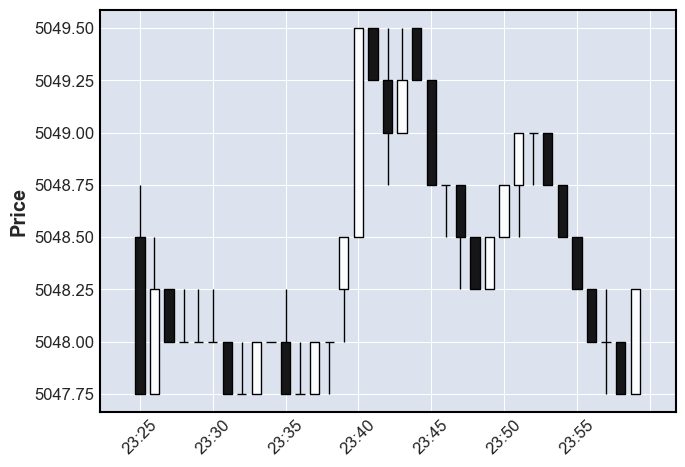

In [7]:
mpf.plot(df_resampled.dropna(), type='candle')

As tick data can be very large - particularly for very liquid instruments - we also provide asynchronous modes for request parallelization

Here we use asynchio lib to gather our tasks then execute and display - we can also extract any errors from the response metadata.

In [8]:
tasks = asyncio.gather(
    historical_pricing.events.Definition('ESZ24').get_data_async(closure='ES Mini Dec 23'),
    historical_pricing.summaries.Definition('AAPL.O').get_data_async(closure='Apple'),
    historical_pricing.events.Definition('GBP=').get_data_async(closure='GBP='),
)

In [9]:
await tasks

def display_reponse(response):
    print(response)
    print("\nReponse received for", response.closure)
    if response.is_success:
        display(response.data.df)
        print(response.errors)
    else:
        print(response.http_status)

vodafone, apple, microsoft = tasks.result()

display_reponse(vodafone)
display_reponse(apple)
display_reponse(microsoft)

Response(is_success=True, raw=[<Response [200 OK]>], errors=[Error(code='TS.Intraday.Warning.95004', message='ESZ24 - Trades interleaving with corrections is currently not supported. Corrections will not be returned.')], closure='ES Mini Dec 23', requests_count=1, _data_factory=<refinitiv.data.content._historical_data_provider.HistoricalDataFactoryMultiResponse object at 0x120e6a400>, _kwargs={'auto_retry': False, 'event_types': None, 'start': None, 'end': None, 'adjustments': None, 'count': None, 'fields': [], 'extended_params': None, '__data_type__': <ContentType.HISTORICAL_PRICING_EVENTS: 46>, '__content_type__': <ContentType.HISTORICAL_PRICING_EVENTS: 46>, 'closure': 'ES Mini Dec 23', 'responses': [Response(is_success=True, raw=<Response [200 OK]>, errors=[Error(code='TS.Intraday.Warning.95004', message='ESZ24 - Trades interleaving with corrections is currently not supported. Corrections will not be returned.')], closure='ES Mini Dec 23', requests_count=1, _data_factory=<refinitiv.

ESZ24,EVENT_TYPE,RTL,SOURCE_DATETIME,SEQNUM,TRDPRC_1,TRDVOL_1,ACVOL_UNS,VWAP,BID,BIDSIZE,...,TRD_STATUS,HALT_RSN,NETCHNG_1,AGGRS_SID1,OPEN_PRC,HIGH_1,LOW_1,MID_PRICE,QUALIFIERS,TAG
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-16 14:39:17.976,quote,16656,2024-02-16T14:39:17.894000000Z,32591267,<NA>,<NA>,<NA>,<NA>,5193.0,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5200.5,OPN[PRC_QL_CD],d16_m02_y2024_h14_m39_s17_ms0976_0_16656_0_39
2024-02-16 14:39:19.534,quote,16672,2024-02-16T14:39:19.473000000Z,32592473,<NA>,<NA>,<NA>,<NA>,5193.0,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5200.375,OPN[PRC_QL_CD],d16_m02_y2024_h14_m39_s19_ms0534_0_16672_0_39
2024-02-16 14:39:20.503,quote,16688,2024-02-16T14:39:20.450000000Z,32593206,<NA>,<NA>,<NA>,<NA>,5192.75,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5200.25,OPN[PRC_QL_CD],d16_m02_y2024_h14_m39_s20_ms0503_0_16688_0_39
2024-02-16 14:39:20.503,quote,16704,2024-02-16T14:39:20.450000000Z,32593217,<NA>,<NA>,<NA>,<NA>,5192.75,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5200.125,OPN[PRC_QL_CD],d16_m02_y2024_h14_m39_s20_ms0503_0_16704_0_39
2024-02-16 14:39:24.649,quote,16720,2024-02-16T14:39:24.599000000Z,32595442,<NA>,<NA>,<NA>,<NA>,5192.5,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5200.0,OPN[PRC_QL_CD],d16_m02_y2024_h14_m39_s24_ms0649_0_16720_0_39
2024-02-16 14:39:24.649,quote,16736,2024-02-16T14:39:24.599000000Z,32595472,<NA>,<NA>,<NA>,<NA>,5192.5,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5199.875,OPN[PRC_QL_CD],d16_m02_y2024_h14_m39_s24_ms0649_0_16736_0_39
2024-02-16 14:39:37.620,quote,16752,2024-02-16T14:39:37.575000000Z,32601744,<NA>,<NA>,<NA>,<NA>,5192.5,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5199.75,OPN[PRC_QL_CD],d16_m02_y2024_h14_m39_s37_ms0620_0_16752_0_39
2024-02-16 14:39:42.838,quote,16768,2024-02-16T14:39:42.774000000Z,32604058,<NA>,<NA>,<NA>,<NA>,5192.25,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5199.625,OPN[PRC_QL_CD],d16_m02_y2024_h14_m39_s42_ms0838_0_16768_0_39
2024-02-16 14:39:42.838,quote,16784,2024-02-16T14:39:42.774000000Z,32604059,<NA>,<NA>,<NA>,<NA>,5192.25,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5199.5,OPN[PRC_QL_CD],d16_m02_y2024_h14_m39_s42_ms0838_0_16784_0_39


[Error(code='TS.Intraday.Warning.95004', message='ESZ24 - Trades interleaving with corrections is currently not supported. Corrections will not be returned.')]
Response(is_success=True, raw=[<Response [200 OK]>], errors=[], closure='Apple', requests_count=1, _data_factory=<refinitiv.data.content._historical_data_provider.HistoricalDataFactoryMultiResponse object at 0x120e6a400>, _kwargs={'auto_retry': False, 'interval': None, 'start': None, 'end': None, 'adjustments': None, 'sessions': None, 'count': None, 'fields': [], 'extended_params': None, '__data_type__': <ContentType.HISTORICAL_PRICING_INTERDAY_SUMMARIES: 47>, '__content_type__': <ContentType.HISTORICAL_PRICING_INTERDAY_SUMMARIES: 47>, 'closure': 'Apple', 'responses': [Response(is_success=True, raw=<Response [200 OK]>, errors=[], closure='Apple', requests_count=1, _data_factory=<refinitiv.data.content._historical_response_factory.HistoricalResponseFactory object at 0x1593aad90>, _kwargs={'session': <refinitiv.data.session.Defini

AAPL.O,TRDPRC_1,HIGH_1,LOW_1,ACVOL_UNS,OPEN_PRC,BID,ASK,TRNOVR_UNS,VWAP,BLKCOUNT,BLKVOLUM,NUM_MOVES,TRD_STATUS,SALTIM,NAVALUE
Date,,,,,,,,,,,,,,,
2024-01-19,191.56,191.95,188.82,68902985,189.33,191.56,191.58,13133948064,190.5875,114,20524323,682664,1,75600,<NA>
2024-01-22,193.89,195.33,192.26,60133852,192.3,193.87,193.89,11665313662,194.0172,117,13156251,718108,1,75600,<NA>
2024-01-23,195.18,195.75,193.8299,42355590,195.02,195.15,195.16,8251729311,194.8101,71,7055943,533093,1,75600,<NA>
2024-01-24,194.5,196.38,194.34,53631316,195.42,194.51,194.52,10469170814,195.2639,81,12918815,594714,1,76500,<NA>
2024-01-25,194.17,196.2675,193.1125,54822126,195.22,194.17,194.19,10675713322,194.7893,53,10353773,644526,1,75600,<NA>
2024-01-26,192.42,194.76,191.94,44594011,194.27,192.4,192.42,8612023654,193.1565,52,9864823,534166,1,76500,<NA>
2024-01-29,191.73,192.2,189.58,47145622,192.01,191.78,191.79,9018739496,191.2558,77,12928180,599513,1,75600,<NA>
2024-01-30,188.04,191.8,187.47,55859370,190.94,187.97,187.99,10545830681,188.834,85,9242424,690707,1,75600,<NA>
2024-01-31,184.4,187.095,184.35,55467803,187.04,184.38,184.39,10281095493,185.4123,84,14164675,679844,1,75600,<NA>


[]
Response(is_success=True, raw=[<Response [200 OK]>], errors=[Error(code='TS.Intraday.Warning.95004', message='GBP= - Trades interleaving with corrections is currently not supported. Corrections will not be returned.')], closure='GBP=', requests_count=1, _data_factory=<refinitiv.data.content._historical_data_provider.HistoricalDataFactoryMultiResponse object at 0x120e6a400>, _kwargs={'auto_retry': False, 'event_types': None, 'start': None, 'end': None, 'adjustments': None, 'count': None, 'fields': [], 'extended_params': None, '__data_type__': <ContentType.HISTORICAL_PRICING_EVENTS: 46>, '__content_type__': <ContentType.HISTORICAL_PRICING_EVENTS: 46>, 'closure': 'GBP=', 'responses': [Response(is_success=True, raw=<Response [200 OK]>, errors=[Error(code='TS.Intraday.Warning.95004', message='GBP= - Trades interleaving with corrections is currently not supported. Corrections will not be returned.')], closure='GBP=', requests_count=1, _data_factory=<refinitiv.data.content._historical_resp

GBP=,EVENT_TYPE,RTL,SOURCE_DATETIME,BID,ASK,MID_PRICE,DSPLY_NAME,SRC_REF1,DLG_CODE1,CTBTR_1,CTB_LOC1,QUALIFIERS,TAG
Timestamp,,,,,,,,,,,,,
2024-02-16 14:58:03.026,quote,5470,<NA>,1.2561,1.2563,1.2562,<NA>,NBJX,NBJJ,NEDBANK LTD,JHB,<NA>,d16_m02_y2024_h14_m58_s03_ms0026_0_5470_0_2
2024-02-16 14:58:03.691,quote,5534,<NA>,1.256,1.2564,1.2562,<NA>,BCFX,<NA>,BARCLAYS,LON,<NA>,d16_m02_y2024_h14_m58_s03_ms0691_0_5534_0_2
2024-02-16 14:58:04.179,quote,5598,<NA>,1.2562,1.2563,1.25625,<NA>,<NA>,ZKBZ,ZUERCHER KB,ZUR,<NA>,d16_m02_y2024_h14_m58_s04_ms0179_0_5598_0_2
2024-02-16 14:58:04.327,quote,5662,<NA>,1.256,1.2565,1.25625,<NA>,RAB1,RABX,RABOBANKGFM,LON,<NA>,d16_m02_y2024_h14_m58_s04_ms0327_0_5662_0_2
2024-02-16 14:58:04.693,quote,5726,<NA>,1.256,1.2564,1.2562,<NA>,BCFX,<NA>,BARCLAYS,LON,<NA>,d16_m02_y2024_h14_m58_s04_ms0693_0_5726_0_2
2024-02-16 14:58:04.889,quote,5790,<NA>,1.256,1.2564,1.2562,<NA>,NBJX,NBJJ,NEDBANK LTD,JHB,<NA>,d16_m02_y2024_h14_m58_s04_ms0889_0_5790_0_2
2024-02-16 14:58:05.715,quote,5854,<NA>,1.2561,1.2565,1.2563,<NA>,BCFX,<NA>,BARCLAYS,LON,<NA>,d16_m02_y2024_h14_m58_s05_ms0715_0_5854_0_2
2024-02-16 14:58:06.213,quote,5918,<NA>,1.2559,1.2566,1.25625,<NA>,<NA>,<NA>,SEB,STO,<NA>,d16_m02_y2024_h14_m58_s06_ms0213_0_5918_0_2
2024-02-16 14:58:07.142,quote,5982,<NA>,1.2561,1.2562,1.25615,<NA>,<NA>,WBCA,WESTPAC,SYD,<NA>,d16_m02_y2024_h14_m58_s07_ms0142_0_5982_0_2


[Error(code='TS.Intraday.Warning.95004', message='GBP= - Trades interleaving with corrections is currently not supported. Corrections will not be returned.')]


### Close the session

In [10]:
rd.close_session()